<a href="https://colab.research.google.com/github/DarksterTwilight/Simple_GAN_fastion_mnist/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Dependencies 

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 578.1 MB 8.6 kB/s 
     |████████████████████████████████| 578.1 MB 6.9 kB/s 
     |████████████████████████████████| 511.8 MB 28 kB/s 


In [2]:
!pip install tensorflow-datasets ipwedgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ipwedgets (from versions: none)
ERROR: No matching distribution found for ipwedgets


In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
  

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#Bringng in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteILPSWJ/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteILPSWJ/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## Viz Data and Build Dataset

In [8]:
# Do some data transformation
import numpy as np

In [9]:
# Set up connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [10]:
# Getting data out of pipeline
print(dataiterator.next()['image'].shape)
# Reshapping 
print(np.squeeze(dataiterator.next()['image']).shape)

(28, 28, 1)
(28, 28)


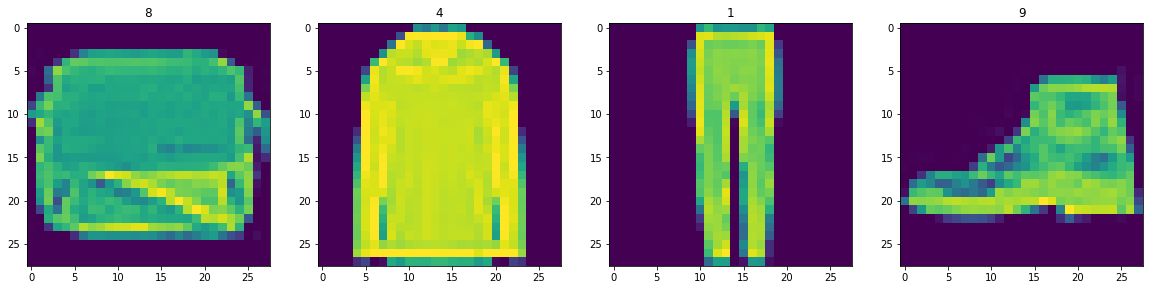

In [11]:
#Set up subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [12]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f90e29d0>,
      dtype=object)

In [13]:
# Sacale and return image only
def scale_image(data):
  image = data['image']
  return image/255

In [14]:
# map
# cache
# shuffle
# batch
# prefetch

ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Build Neural Network

### Import Modelling Components

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### Build Generator

In [17]:
def build_generator():
  model = Sequential()
  # Takes in random values and reshape it into 7x7x128
  # Begaining of the the generator image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #Up smapling block 1
  model.add(UpSampling2D())
  # UpSampling the input from 7x7x128 to 14x14x128
  # this is done vai dublicating hence this layer does not have any parameter
  model.add(Conv2D(128,5,padding ='same'))
  # condensing the information
  model.add(LeakyReLU(0.2))


  #Upsampling BLock 2
  #
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Conv block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))
  #Conv Block 2
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1,4, padding='same', activation='sigmoid'))

  return model

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [20]:
img = generator.predict(np.random.randn(4,128,1))
# generating 4 diff images
img

1/1 [==============================] - 7s 7s/step


array([[[[0.4996675 ],
         [0.50617474],
         [0.50907874],
         ...,
         [0.5091615 ],
         [0.5078331 ],
         [0.5038405 ]],

        [[0.49405703],
         [0.49622792],
         [0.5004705 ],
         ...,
         [0.5076    ],
         [0.50540674],
         [0.5030523 ]],

        [[0.49341595],
         [0.49374354],
         [0.5018671 ],
         ...,
         [0.5075415 ],
         [0.5016312 ],
         [0.50337166]],

        ...,

        [[0.5025025 ],
         [0.49857298],
         [0.49402484],
         ...,
         [0.50060695],
         [0.49816644],
         [0.49658725]],

        [[0.5027173 ],
         [0.49874988],
         [0.49338636],
         ...,
         [0.49491078],
         [0.49864507],
         [0.4995261 ]],

        [[0.5029628 ],
         [0.502816  ],
         [0.49673498],
         ...,
         [0.4963398 ],
         [0.50003356],
         [0.49847955]]],


       [[[0.50777906],
         [0.5102582 ],
         [0.50

In [21]:
img.shape

(4, 28, 28, 1)

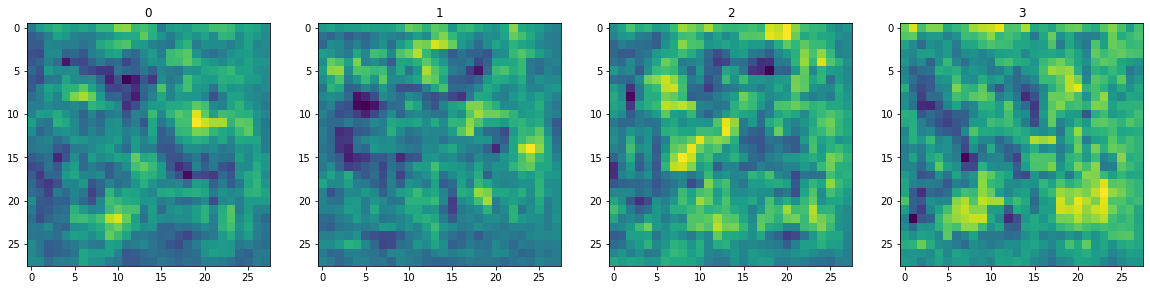

In [22]:
#Set up subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(img):
  ax[idx].imshow(np.squeeze(image))
  ax[idx].title.set_text(idx)

### Build Discrimenator

In [23]:
def build_Discriminator():
  model = Sequential()
  
  # First Conv Block
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Thrird Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))  
  #Forth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to ense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  #0--> true img ; 1--> False img


  return model

In [24]:
discriminator = build_Discriminator()

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [26]:
img.shape

(4, 28, 28, 1)

In [27]:
image.shape

(28, 28, 1)

In [28]:
discriminator.predict(img)

1/1 [==============================] - 0s 159ms/step


array([[0.49871323],
       [0.49884   ],
       [0.49897066],
       [0.49897024]], dtype=float32)

## Construct Training Loop

### Setup Losses and Opimizers

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [30]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
# these no. are random and needed to be played with to get optimum no.

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [31]:
# Importing base model class to subclass our training step
from tensorflow.keras.models import Model

In [32]:
tf.random.normal((6,128))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[-5.15997589e-01,  9.30818737e-01, -1.91507995e-01,
        -1.86446421e-02,  2.02291393e+00,  4.13412422e-01,
         4.33743805e-01,  1.15173185e+00,  2.80478626e-01,
         4.31118846e-01,  2.13773918e+00, -3.56364250e-02,
         2.33713889e+00, -1.42009413e+00,  2.13928843e+00,
         1.41180933e+00, -3.58335048e-01,  2.79934794e-01,
        -3.04367572e-01,  1.59312880e+00,  1.75236619e+00,
         2.72784948e-01, -6.42554164e-01,  3.58078122e-01,
        -2.38026810e+00, -1.02462852e+00, -1.76685095e+00,
        -1.11397064e+00, -1.82561159e+00, -8.81016016e-01,
        -1.22625753e-01, -1.95115542e+00,  7.19916761e-01,
        -7.10661829e-01, -9.11613464e-01,  7.35458851e-01,
        -4.44808096e-01, -9.57900345e-01,  7.71903574e-01,
        -7.85258353e-01, -4.89480555e-01,  5.74541092e-01,
        -1.00014853e+00, -1.11451900e+00,  1.61962736e+00,
         1.94361210e+00,  8.66273046e-01,  3.15195680e-01,
      

In [33]:
tf.zeros_like( tf.random.normal((6,32)) )

<tf.Tensor: shape=(6, 32), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [34]:
tf.ones_like( tf.random.normal((6,32)) )

<tf.Tensor: shape=(6, 32), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)>

In [39]:
tryial = tf.concat([ tf.zeros_like( tf.random.normal((6,32))), tf.ones_like( tf.random.normal((6,32))) ],axis = 0)
print(tryial.shape)

(12, 32)


In [41]:
class FasionGAN(Model):
  def __init__(self, discriminator, generator, *args, **kwargs):
    # pass thorugh args and kwargs to our base model
    super().__init__(*args, **kwargs)

    # create attribtes for gen and disc
    self.generator = generator
    self.discriminator = discriminator
    
  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attribute for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss
    




  # This method is called when we call .fil method
  def train_step(self,batch):
    # get data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)
  # def test_step(self): to run an evaulation funtion
    # Tain the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discrminator model

      #Taking real images and passing through the discriminator
      #Training = True will activate the dropout layer
      yhat_real = self.discriminator(real_images, training = True)

      #Passing the fake images to te dicsciminator
      yhat_fake = self.discriminator(fake_images, training = True)

      #Combining both the results
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)


      # Create labels real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
      

      # Add some noise to the output (so discrminator doesn't learn too fast for generator to cope-up)
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      # Adding -ve noise to the 1's
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake],axis=0)

      # Calculate Losses - BINARYCROSS
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)


    # Apply backpropogation - nn learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))



    # Train the Generator 
    with tf.GradientTape() as g_tape:
      # Generate some new target
      gen_image = self.generator(tf.random.normal((128,128,1), training = True))
      
      # Create the predicted labels
      # We don't wnat our discriminator to be learning while setting up our generator
      predicted_labels = self.discriminator(gen_images, training = False) 

      # Calculate loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    # Apply backpropogation


In [ ]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[ 3.37014556e-01],
        [-3.52067411e-01],
        [-1.16870153e+00],
        [-3.92866731e-01],
        [-5.83818734e-01],
        [ 3.62359136e-01],
        [-5.70584893e-01],
        [ 3.53887916e-01],
        [ 7.80958712e-01],
        [-3.70849401e-01],
        [-1.77862144e+00],
        [-1.31207705e+00],
        [-3.41899842e-02],
        [ 2.77827692e+00],
        [-1.06277898e-01],
        [ 6.36692718e-02],
        [-1.52861083e+00],
        [-1.85835600e+00],
        [ 1.88590884e+00],
        [-9.00428891e-01],
        [ 4.15041387e-01],
        [ 1.52642652e-01],
        [-6.85501754e-01],
        [ 5.74864388e-01],
        [-9.23219562e-01],
        [ 4.76679057e-01],
        [ 8.44100490e-02],
        [ 1.21852708e+00],
        [ 1.11494100e+00],
        [ 3.99242222e-01],
        [ 5.76221108e-01],
        [ 1.01555431e+00],
        [ 7.75479317e-01],
        [ 3.71857315e-01],
        [-1.10786867e+00],
  

### Build Subclassed Model

### Build Callback

### Train

### Review Performance

## Test Out Generator

### Generate Image

### Save Model